# Table of Contents
* [Intro](#Intro)
* [Load and Plot Image](#Load-and-Plot-Image)
	* [Plot Color Channels](#Plot-Color-Channels)
* [Image from array](#Image-from-array)
	* [Morphological Operations](#Morphological-Operations)
* [Convolution Filters](#Convolution-Filters)
	* [Gaussian Convolution](#Gaussian-Convolution)
* [Images Normalization](#Images-Normalization)
	* [Mean/Deviation of Images](#Mean/Deviation-of-Images)
	* [Normalization](#Normalization)


# Intro

Notebook that explores the basics of image processing in Python, like image loading, representation and transformations.

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import sys
sys.path.append(os.path.join(os.pardir))

from utils import image_processing
%load_ext autoreload
%autoreload 2

%matplotlib inline

sns.set_style("dark")

# Load and Plot Image

In [2]:
img_path = os.path.join(os.path.pardir, 'resources', 'mona_lisa.jpg')

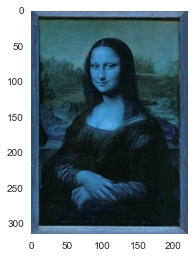

In [3]:
# Load with open-cv
import cv2
img = cv2.imread(img_path)
sns.plt.imshow(img)
sns.plt.show()

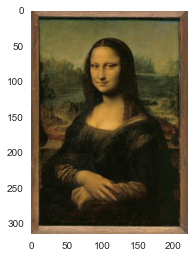

In [9]:
# Load with scikit
from skimage import io
img = io.imread(img_path)
sns.plt.imshow(img)
sns.plt.show()

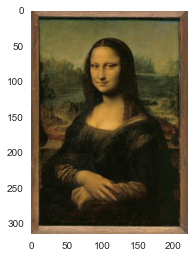

In [8]:
# Load with PIL
from PIL import Image
with Image.open(img_path) as img:
    sns.plt.imshow(img.convert(mode='RGB'))
    sns.plt.show()

## Plot Color Channels

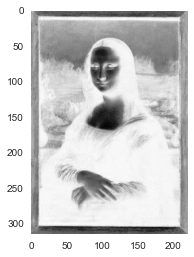

In [16]:
# red color channel
sns.plt.imshow(img[:,:,0])
sns.plt.show()

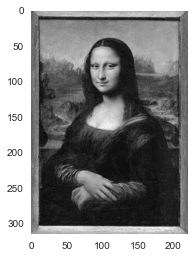

In [18]:
# red color channel in grey color map 
sns.plt.imshow(img[:,:,0], cmap='gray')
sns.plt.show()

# Image from array

In [23]:
# dummy list of strings representing our image
a = ["0000000000",
     "0111111100",
     "0000111100",
     "0000111100",
     "0001111100",
     "0000111100",
     "0001100000",
     "0000000000",
     "0000000000"]

In [24]:
# build numpy array of 0s and 1s from previous list
a = np.array([list(map(int, s)) for s in a], dtype=np.float32)
a.shape

(9, 10)

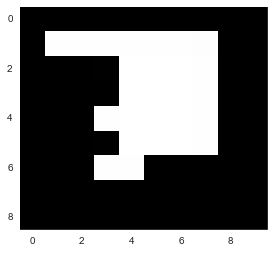

In [27]:
# plot image
plt.imshow(a, cmap='gray', interpolation='none', vmin=0, vmax=1)
plt.show()

## Morphological Operations

In [33]:
from skimage import morphology
b = np.array([[1,1,1],
            [1,1,1],
            [1,1,1]])
res = morphology.binary_dilation(a, b).astype(np.uint8)
#res = morphology.binary_erosion(res, b).astype(np.uint8)

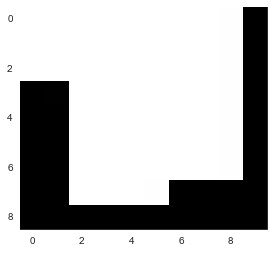

In [34]:
plt.imshow(res, cmap='gray', interpolation='none', vmin=0, vmax=1)
plt.show()

In [14]:
b = np.array([[0,0,0,0],
            [0,1,1,0],
            [0,0,0,0]])
s = np.array([[1,0],
              [1,1]])

In [15]:
res = morphology.binary_dilation(b, s).astype(np.uint8)
res

array([[1, 1, 0, 0],
       [1, 1, 1, 0],
       [0, 0, 0, 0]], dtype=uint8)

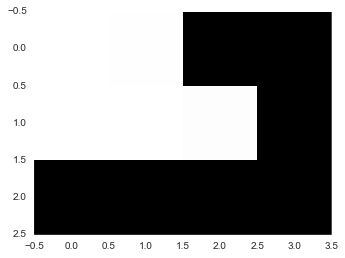

In [16]:
plt.imshow(res, cmap='gray', interpolation='none', vmin=0, vmax=1)
plt.show()

# Convolution Filters

http://setosa.io/ev/image-kernels/

In [29]:
from scipy import ndimage
from skimage import data

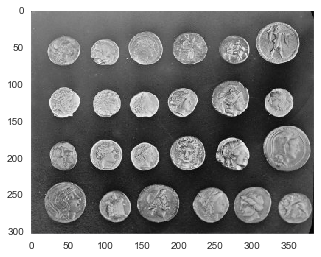

In [30]:
# load initial ref image
image = data.coins()
plt.imshow(image, cmap='gray', interpolation='none')
plt.show()

In [31]:
# convolve image with custom kernel
k = np.array([[1/16,1/8,1/16],
            [1/18,1,1/8],
            [1/16,1/8,1/16]])
n_image = ndimage.convolve(image, k, mode='constant', cval=0.0)

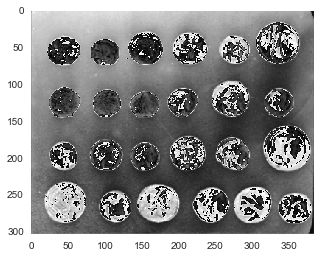

In [32]:
# plot convolved image
plt.imshow(n_image, cmap='gray', interpolation='none')
plt.show()

## Gaussian Convolution

Try convolving an image using a Gaussian kernel.

In [43]:
# gaussian distribution formula
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

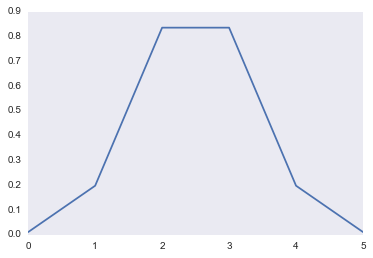

In [72]:
# plot 1D gaussian curve
x = np.linspace(-3.0, 3.0, 6)
z = gaussian(x, 0, 1)
plt.plot(z)

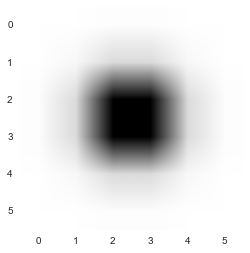

In [73]:
# compute 2D gaussian
z_2d = np.matmul(z.reshape(-1, 1), z.reshape(1, -1))
plt.imshow(z_2d)

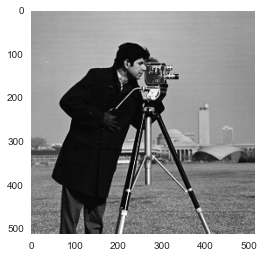

In [74]:
# load initial ref image
image = data.camera()
plt.imshow(image, cmap='gray')
plt.show()

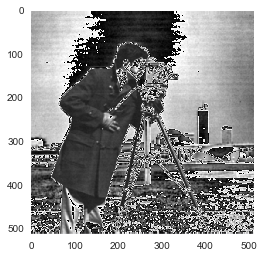

In [75]:
# convolve
n_image = ndimage.convolve(image, z_2d)
plt.imshow(n_image, cmap='gray', interpolation='none')
plt.show()

# Images Normalization

Using [CelebA Dataset](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html)

Reference Course: [creative-applications-of-deep-learning-with-tensorflow](https://www.kadenze.com/courses/creative-applications-of-deep-learning-with-tensorflow-iv/sessions/introduction-to-tensorflow)

In [2]:
# load all imgs filepaths for the celeba database
dir_path = os.path.join(os.pardir, 'resources', 'img_align_celeba')
imgs_filepath = [os.path.join(dir_path, img_name) for img_name in os.listdir(dir_path)]
print(len(imgs_filepath))

202599


In [3]:
# load subset of images
imgs = image_processing.load_data(imgs_filepath[:100])
imgs.shape

(100, 218, 178, 3)

## Mean/Deviation of Images

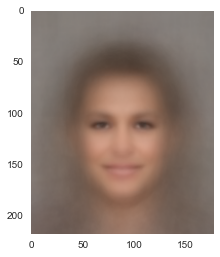

In [24]:
# compute mean images (across list of images, so axis=0)
mean_img = np.mean(imgs, axis=0)
# plot image (convert to int values)
plt.imshow(mean_img.astype(np.uint8))
plt.show()

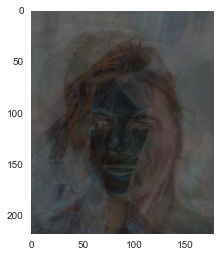

In [16]:
# compute std images (across list of images, so axis=0)
std_img = np.std(imgs, axis=0)
# plot image (convert to int values)
plt.imshow(std_img.astype(np.uint8))
plt.show()

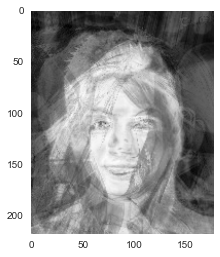

In [22]:
plt.imshow(np.mean(std_img, axis=2).astype(np.uint8))
plt.show()

## Normalization

In [7]:
# flatten imgs to single vector
flattened_imgs = imgs.ravel()
print(flattened_imgs.shape)

(1164120,)


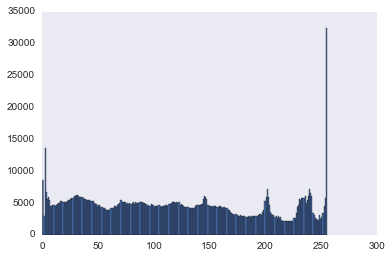

In [14]:
# plot flattened images
(_, _, _) = plt.hist(flattened_imgs, bins=255)

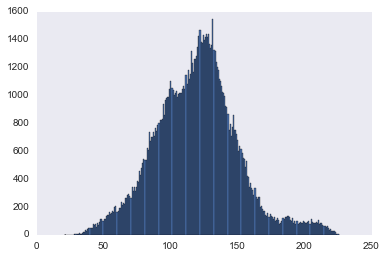

In [18]:
# plot flattened mean image
(_, _, _) = plt.hist(mean_img.ravel(), bins=255)

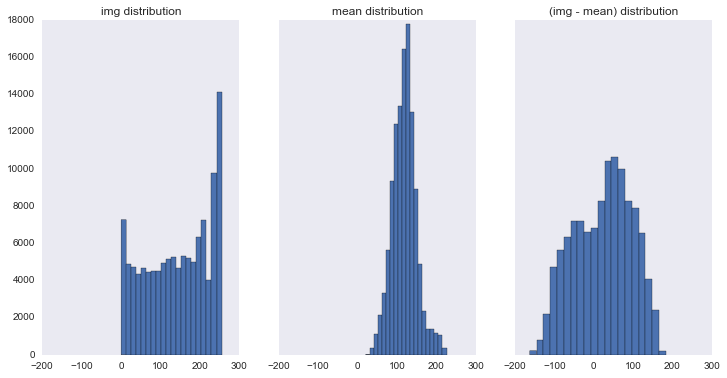

In [19]:
bins = 20
fig, axs = plt.subplots(1, 3, figsize=(12, 6), sharey=True, sharex=True)
axs[0].hist((imgs[0]).ravel(), bins)
axs[0].set_title('img distribution')
axs[1].hist((mean_img).ravel(), bins)
axs[1].set_title('mean distribution')
axs[2].hist((imgs[0] - mean_img).ravel(), bins)
axs[2].set_title('(img - mean) distribution')

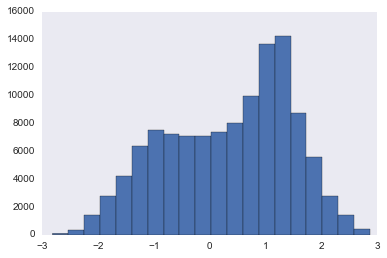

In [21]:
# normalized image (remove mean and divide by std)
(_, _, _) = plt.hist(((imgs[0] - mean_img)/std_img).ravel(), bins=20)